In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
import gmaps
from config import gkey


# Read Utility Energy Survey Data

energy_df = pd.read_csv("Data/duke_energy_2010.csv")
energy_df.head()

,zip,SAMPLE_ID,SAMPLE_ENERGY,SAMPLE_USAGE,SAMPLE_REVENUE,SAMPLE_HHAGE,SAMPLE_INC,SAMPLE_REGION,SAMPLE_ACCOUNT_ACTIVATION_DATE,SAMPLE_MAILING_ADDRESS,...,ccreal,scarce,nuclear,solar,wind,muchasican,futurepower,phev,Q7,_merge
0,27603,10100106,17765,1480.420044,1899.530029,4,6,NORTHERN REGION,20070731,180 TRAVEL LITE DR,...,2.0,5.0,8.0,6.0,6.0,10.0,3.0,1.0,5,matched (3)
1,27807,10100111,17818,1484.829956,1919.380005,6,4,NORTHERN REGION,19910523,7554 SQUIRREL DEN RD,...,9.0,1.0,10.0,10.0,4.0,8.0,9.0,9.0,5,matched (3)
2,27540,10100131,18013,1501.079956,1950.459961,3,8,NORTHERN REGION,20040622,729 LITTLE LEAF CT,...,1.0,8.0,5.0,8.0,8.0,4.0,8.0,5.0,6,matched (3)
3,27545,10100146,18062,1505.170044,1819.969971,3,5,NORTHERN REGION,20000417,406 PINE RUN,...,10.0,9.0,4.0,10.0,8.0,8.0,9.0,4.0,3,matched (3)
4,27616,10100171,18333,1527.750000,1695.010010,4,3,NORTHERN REGION,19920313,3416 TUNAS ST,...,10.0,10.0,10.0,10.0,7.0,6.0,7.0,1.0,4,matched (3)


In [3]:
# Creating scales based on shared constructs: "greeness" "first adopter" "conserver"

greenness = []

for index, row in energy_df.iterrows():
    greenness.append(row.conscientiousrecycle + row.ccreal + row.reduceenergy + row.willingchanges)

conserver = []

for index, row in energy_df.iterrows():
    conserver.append(row.muchasican + row.realeffort  + row.payattn)
    
firstadopter = []

for index, row in energy_df.iterrows():
    firstadopter.append(row.firstone + row.phev + row.mycellphone)

In [4]:
# Refine indices by scaling to 10 likert points for each set of survey items

energy_df["greenness"]=pd.Series(greenness)/4
energy_df["conserver"]=pd.Series(conserver)/3
energy_df["firstadopter"]=pd.Series(firstadopter)/3

energy_df.head(20)


,zip,SAMPLE_ID,SAMPLE_ENERGY,SAMPLE_USAGE,SAMPLE_REVENUE,SAMPLE_HHAGE,SAMPLE_INC,SAMPLE_REGION,SAMPLE_ACCOUNT_ACTIVATION_DATE,SAMPLE_MAILING_ADDRESS,...,solar,wind,muchasican,futurepower,phev,Q7,_merge,greenness,conserver,firstadopter
0,27603,10100106,17765,1480.420044,1899.530029,4,6,NORTHERN REGION,20070731,180 TRAVEL LITE DR,...,6.0,6.0,10.0,3.0,1.0,5,matched (3),3.75,8.333333,5.333333
1,27807,10100111,17818,1484.829956,1919.380005,6,4,NORTHERN REGION,19910523,7554 SQUIRREL DEN RD,...,10.0,4.0,8.0,9.0,9.0,5,matched (3),7.00,7.333333,6.333333
2,27540,10100131,18013,1501.079956,1950.459961,3,8,NORTHERN REGION,20040622,729 LITTLE LEAF CT,...,8.0,8.0,4.0,8.0,5.0,6,matched (3),5.50,6.000000,7.666667
3,27545,10100146,18062,1505.170044,1819.969971,3,5,NORTHERN REGION,20000417,406 PINE RUN,...,10.0,8.0,8.0,9.0,4.0,3,matched (3),8.00,8.666667,4.333333
4,27616,10100171,18333,1527.750000,1695.010010,4,3,NORTHERN REGION,19920313,3416 TUNAS ST,...,10.0,7.0,6.0,7.0,1.0,4,matched (3),8.50,7.333333,3.666667
5,27609,10100211,18734,1561.170044,1853.449951,5,9,NORTHERN REGION,19920814,2109 TREVERTON PL,...,5.0,3.0,10.0,9.0,5.0,5,matched (3),8.75,9.666667,6.333333
6,27612,10100241,19144,1595.329956,1959.550049,4,0,NORTHERN REGION,19890727,2421 BASIL DR,...,5.0,5.0,6.0,9.0,10.0,6,matched (3),8.50,8.666667,5.666667
7,27573,10100261,19334,1611.170044,2082.909912,5,7,NORTHERN REGION,20071011,510 W GORDON ST,...,10.0,10.0,8.0,8.0,8.0,5,matched (3),7.75,7.333333,5.333333
8,27603,10100276,19417,1618.079956,2001.609985,5,7,NORTHERN REGION,19871218,537 MAPLE LN,...,9.0,9.0,8.0,8.0,7.0,5,matched (3),8.50,8.666667,7.333333
9,27606,10100291,19498,1624.829956,1966.479980,5,6,NORTHERN REGION,19770610,4609 WOODSIDE CT,...,8.0,8.0,7.0,7.0,2.0,5,matched (3),6.50,7.000000,3.000000


In [5]:
# Remove missing values

## First diagnose missingess - print total observations for each survey item
# counts only non-missing
total_rows = energy_df.count()
print(total_rows)

zip                               4705
SAMPLE_ID                         4705
SAMPLE_ENERGY                     4705
SAMPLE_USAGE                      4705
SAMPLE_REVENUE                    4705
SAMPLE_HHAGE                      4705
SAMPLE_INC                        4705
SAMPLE_REGION                     4705
SAMPLE_ACCOUNT_ACTIVATION_DATE    4705
SAMPLE_MAILING_ADDRESS            4705
SAMPLE_MAILING_CITY               4705
SAMPLE_MAILING_STATE              4705
SAMPLE_MAILING_ZIP                4705
SAMPLE_PRIMARY_PHONE              4705
SAMPLE_SECONDARY_PHONE            4705
SAMPLE_PREMISE_ADDRESS            4705
SAMPLE_PREMISE_CITY               4705
SAMPLE_PREMISE_STATE              4705
SAMPLE_PREMISE_ZIP                4705
SAMPLE_PREMISE_COUNTY             4705
SAMPLE_MONTHS                     4705
SAMPLE_DWELLING                   4705
SAMPLE_FAMCOMP                    4705
SAMPLE_HHADULTS                   4705
SAMPLE_HHCHILDS                   4705
SAMPLE_HHPEOPLE          

In [6]:
# Drop rows with missing data on attitude indices

energy_df_clean= energy_df.dropna(subset=['greenness', 'conserver', 'firstadopter'])
total_rows = energy_df_clean.count()
print(total_rows)

zip                               4069
SAMPLE_ID                         4069
SAMPLE_ENERGY                     4069
SAMPLE_USAGE                      4069
SAMPLE_REVENUE                    4069
SAMPLE_HHAGE                      4069
SAMPLE_INC                        4069
SAMPLE_REGION                     4069
SAMPLE_ACCOUNT_ACTIVATION_DATE    4069
SAMPLE_MAILING_ADDRESS            4069
SAMPLE_MAILING_CITY               4069
SAMPLE_MAILING_STATE              4069
SAMPLE_MAILING_ZIP                4069
SAMPLE_PRIMARY_PHONE              4069
SAMPLE_SECONDARY_PHONE            4069
SAMPLE_PREMISE_ADDRESS            4069
SAMPLE_PREMISE_CITY               4069
SAMPLE_PREMISE_STATE              4069
SAMPLE_PREMISE_ZIP                4069
SAMPLE_PREMISE_COUNTY             4069
SAMPLE_MONTHS                     4069
SAMPLE_DWELLING                   4069
SAMPLE_FAMCOMP                    4069
SAMPLE_HHADULTS                   4069
SAMPLE_HHCHILDS                   4069
SAMPLE_HHPEOPLE          

In [7]:
#write cleaned dataframe to new csv
energy_df_clean.to_csv("Data/energy_df_clean5.csv", index=False)

In [8]:
# Create dataframe of zipcodes with mean values of each variable from household dataset

zip_att =energy_df_clean.groupby(["zip"]).mean()
#["myright," "ccisreal"]
#"greenness", "consrver", "firstadopter", "incomeonreport"]
zip_att.head()

,SAMPLE_ID,SAMPLE_ENERGY,SAMPLE_USAGE,SAMPLE_REVENUE,SAMPLE_HHAGE,SAMPLE_ACCOUNT_ACTIVATION_DATE,SAMPLE_MAILING_ZIP,SAMPLE_PREMISE_ZIP,SAMPLE_PREMISE_COUNTY,SAMPLE_MONTHS,...,nuclear,solar,wind,muchasican,futurepower,phev,Q7,greenness,conserver,firstadopter
zip,,,,,,,,,,,,,,,,,,,,,
0,20205886.0,19051.500000,1587.625000,2026.784973,5.000000,2.001088e+07,2.800097e+08,0.000000e+00,144.0,12.000000,...,8.000000,8.5,8.000000,6.000000,8.000000,3.500000,6.500000,8.000000,6.333333,6.666667
27203,14772301.0,12622.615385,1060.595376,1332.591529,4.807692,1.988295e+07,2.720449e+08,2.720348e+08,144.0,11.692308,...,6.846154,8.0,7.961538,7.615385,7.961538,5.192308,8.576923,7.221154,7.705128,4.589744
27205,10110873.5,19252.500000,1604.375000,2048.849976,4.000000,2.005032e+07,2.720546e+08,2.720505e+08,144.0,12.000000,...,6.500000,5.5,3.000000,7.500000,7.500000,5.500000,5.000000,6.875000,7.666667,6.000000
27207,10112766.0,14575.000000,1214.579956,1569.160034,3.000000,1.994050e+07,2.720787e+08,2.720787e+08,110.0,12.000000,...,5.000000,4.0,4.000000,6.000000,6.000000,4.000000,9.000000,4.000000,7.000000,4.666667
27208,10110851.0,6101.000000,508.420013,703.440002,5.000000,2.006112e+07,2.720881e+08,2.720881e+08,144.0,12.000000,...,8.000000,8.0,8.000000,10.000000,10.000000,3.000000,10.000000,9.250000,10.000000,5.666667


In [9]:
# Count non-missing for each variable across zip codes
total_rows1 = zip_att.count()
print(total_rows1)

SAMPLE_ID                         500
SAMPLE_ENERGY                     500
SAMPLE_USAGE                      500
SAMPLE_REVENUE                    500
SAMPLE_HHAGE                      500
SAMPLE_ACCOUNT_ACTIVATION_DATE    500
SAMPLE_MAILING_ZIP                500
SAMPLE_PREMISE_ZIP                500
SAMPLE_PREMISE_COUNTY             500
SAMPLE_MONTHS                     500
SAMPLE_DWELLING                   500
SAMPLE_FAMCOMP                    500
SAMPLE_HHADULTS                   500
SAMPLE_HHCHILDS                   500
SAMPLE_HHPEOPLE                   500
SAMPLE_HOMEOWN                    500
SAMPLE_ADDRYEAR                   500
SAMPLE_CELL                       500
SAMPLE_VER_NUM                    500
SAMPLE_RDM_ID                     500
SAMPLE_RDM_                       500
annkwh                            500
envprotection                     500
windpriority                      500
costpriority                      500
comfortpriority                   500
takensteps  

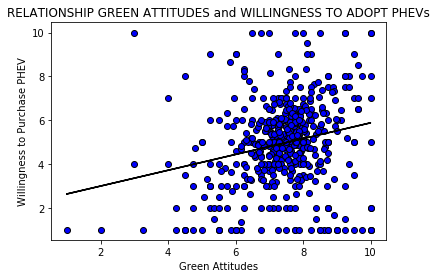

<Figure size 432x288 with 0 Axes>

In [10]:
# #Exploratory graphs
#willingness to purchase plug in electric/hybrid vehicles vs. green attitudes
x_axis = zip_att[['greenness']]
y_axis = zip_att[['phev']]

plt.title("RELATIONSHIP GREEN ATTITUDES and WILLINGNESS TO ADOPT PHEVs")
plt.xlabel("Green Attitudes")
plt.ylabel("Willingness to Purchase PHEV")
plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolor="black")

x1 = zip_att.greenness
y1 = zip_att.phev
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")
plt.show()
plt.savefig("EJ_Attitudes1.png")

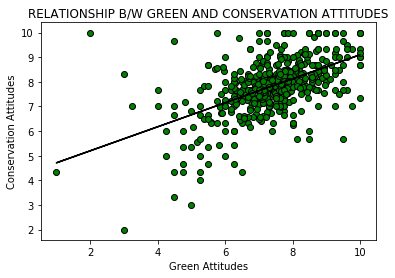

<Figure size 432x288 with 0 Axes>

In [11]:
# relationship b/w grean and conservation attitudes
x_axis = zip_att[['greenness']]
y_axis = zip_att[['conserver']]

plt.title("RELATIONSHIP B/W GREEN AND CONSERVATION ATTITUDES")
plt.xlabel("Green Attitudes")
plt.ylabel("Conservation Attitudes")
plt.scatter(x_axis, y_axis, marker="o", color="green", edgecolor="black")

x1 = zip_att.greenness
y1 = zip_att.conserver
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")

plt.show()
plt.savefig("EJ_Attitudes2.png")

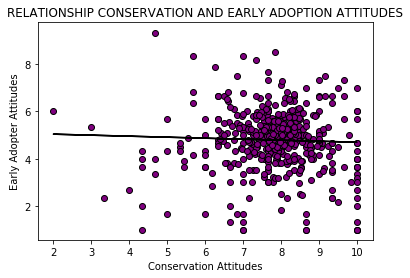

<Figure size 432x288 with 0 Axes>

In [12]:
#relationship conservation and early adoption attitudes
x_axis = zip_att[['conserver']]
y_axis = zip_att[['firstadopter']]

plt.title("RELATIONSHIP CONSERVATION AND EARLY ADOPTION ATTITUDES")
plt.xlabel("Conservation Attitudes")
plt.ylabel("Early Adopter Attitudes")
plt.scatter(x_axis, y_axis, marker="o", color="purple", edgecolor="black")

x1 = zip_att.conserver
y1 = zip_att.firstadopter
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")

plt.show()
plt.savefig("EJ_Attitudes3.png")

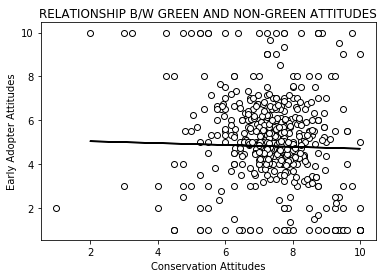

<Figure size 432x288 with 0 Axes>

In [13]:
#relationship b/w green and non-green attitudes
x_axis = zip_att[['greenness']]
y_axis = zip_att[['myright']]

plt.title("RELATIONSHIP B/W GREEN AND NON-GREEN ATTITUDES")
plt.xlabel("Conservation Attitudes")
plt.ylabel("Early Adopter Attitudes")
plt.scatter(x_axis, y_axis, marker="o", color="white", edgecolor="black")

x1 = zip_att.conserver
y1 = zip_att.firstadopter
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")

plt.show()
plt.savefig("EJ_Attitudes4.png")

In [14]:
# Clean zip code column to be consistently formatted to five digits, format as type string
energy_df["Zip"]=energy_df["SAMPLE_PREMISE_ZIP"].astype(str)
energy_df.Zip = energy_df.Zip.str[:5]

In [15]:
# Import CSV file created from US Census Bureau data that ties each zip code in the US to the latitude and longitude 
# for the geographic centroid of the zip code. CSV file is semi-colon delimited. 
file2 = "Data/us-zip-code-latitude-and-longitude.csv"
latlong_df = pd.read_csv(file2,delimiter=';')

In [16]:
# Format zip code as type string
latlong_df["Zip"]=latlong_df["Zip"].astype(str)

In [17]:
# Find the by zip code average energy usage
byzip = energy_df.groupby("Zip")
byzip_average = byzip["SAMPLE_USAGE"].mean()

In [18]:
# Merge the by zip code avearge energy usage data to the latitude and longitude data on Zip
# Only keep records that are contained in both data frames - inner join
# Nonsensical zip codes are dropped, for instance 0 was listed as a zip code in the duke energy data frame
merged_df = pd.merge(byzip_average, latlong_df, how='inner', on='Zip')

 # FIGURE 1 - HEAT MAP

In [22]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [23]:
# Store latitude and longitude in locations
locations = merged_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
usage = merged_df["SAMPLE_USAGE"].astype(float)

In [24]:
# Create heat map layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=usage, dissipating=False, max_intensity=20000, point_radius=.25)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 20000
heat_layer.point_radius = .25

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Figure 2 - Household Features vs. Energy Usage

In [ ]:
# Household square footage data

# Get rid of missing responses - coded as 99 - and I don't know responses - coded as 9 -
energy_sqft = energy_df.loc[(energy_df["Q7"]!=99)]
energy_sqft = energy_sqft.loc[(energy_sqft["Q7"]!=9)]

# Replace 10 with 3 because sequentially <600 sq ft comes before 600-1000 not after 3000+
energy_sqft.loc[energy_sqft['Q7']==10, ['Q7']] = 2

In [ ]:
# Year built data

# Get rid of null values
energy_yearbuilt = energy_df[pd.notnull(energy_df['yearbuilt'])]

In [ ]:
# Heating and AC unit data

# Get rid of null values for heating and ac units
energy_unitage = energy_df[pd.notnull(energy_df['acage'])]
energy_unitage = energy_unitage[pd.notnull(energy_unitage['heatage'])]

# Calculate average age of units
energy_unitage["unitage"] = (energy_unitage['acage'] + energy_unitage['heatage']) / 2

In [ ]:
# MERGE IN OTHER QUESTION DATA
data = pd.io.stata.read_stata('Data/otherQs.dta')
data.to_csv('my_stata_file.csv')

file3 = "my_stata_file.csv"
otherq = pd.read_csv(file3)
otherq.head()

energy_df_q = pd.merge(energy_df, otherq, how='outer', on='SAMPLE_ID')

In [ ]:
# Water heater age data

# Get rid of I don't know coded as 99
energy_waterheater = energy_df_q.loc[(energy_df_q["Q26_001"]!=99)]

# Get rid of null values
energy_waterheater = energy_waterheater[pd.notnull(energy_waterheater['Q26_001'])]

In [ ]:
# Year round data

# Get rid of I don't know coded as 99
energy_yearround = energy_df_q.loc[(energy_df_q["Q12"]!=99)]

# Get rid of null values
energy_yearround = energy_yearround[pd.notnull(energy_yearround['Q12'])]

energy_yearround.loc[energy_yearround['Q12']==3, ['Q12']] = 2

In [ ]:
# Fridge Age

# Get rid of I don't know coded as 99
energy_fridgeage = energy_df_q.loc[(energy_df_q["Q40_001_UNIT1"]!=99)]

# Get rid of null values
energy_fridgeage = energy_fridgeage[pd.notnull(energy_fridgeage['Q40_001_UNIT1'])]

In [ ]:
# Create a six panel figure

# calculate regression line
x1 = energy_sqft.Q7
y1 = energy_sqft.SAMPLE_USAGE

x2 = energy_yearbuilt.yearbuilt
y2 = energy_yearbuilt.SAMPLE_USAGE

x3 = energy_yearround.Q12
y3 = energy_yearround.SAMPLE_USAGE

x4 = energy_unitage.unitage
y4 = energy_unitage.SAMPLE_USAGE

x5 = energy_waterheater.Q26_001
y5 = energy_waterheater.SAMPLE_USAGE

x6 = energy_fridgeage.Q40_001_UNIT1
y6 = energy_fridgeage.SAMPLE_USAGE

stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept

stats2 = linregress(x2, y2)
m2 = stats2.slope
b2 = stats2.intercept

stats3 = linregress(x3, y3)
m3 = stats3.slope
b3 = stats3.intercept

stats4 = linregress(x4, y4)
m4 = stats4.slope
b4 = stats4.intercept

stats5 = linregress(x5, y5)
m5 = stats5.slope
b5 = stats5.intercept

stats6 = linregress(x6, y6)
m6 = stats6.slope
b6 = stats6.intercept

# Create panel for each household feature on 2 by 3 grid
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey='row', constrained_layout=True)

f.suptitle('Energy Usage and Household Features', fontsize=16)

ax1.scatter(energy_sqft["Q7"], energy_sqft["SAMPLE_USAGE"],color='mediumseagreen')
ax1.plot(x1, m1 * x1 + b1, color="black")
ax1.set_title('Size of House', fontsize=10)
ax1.set_xticks((2,4,6,8))
ax1.set_xticklabels(('<1000','2000','3000','3500+'))
ax1.set_xlabel('Square Footage')
ax1.set_ylabel('Energy Usage')

ax2.scatter(energy_yearbuilt["yearbuilt"], energy_yearbuilt["SAMPLE_USAGE"],color='mediumpurple',alpha=0.5)
ax2.plot(x2, m2 * x2 + b2, color="black")
ax2.set_title('Year House Built', fontsize=10)
ax2.set_xlabel('Year')

ax3.scatter(energy_yearround["Q12"], energy_yearround["SAMPLE_USAGE"], color='indianred',alpha=0.5)
ax3.plot(x3, m3 * x3 + b3, color="black")
ax3.set_title('Year Round Usage', fontsize=10)
ax3.set_xticks((1,2))
ax3.set_xticklabels(('Primary','Secondary'))
ax3.set_xlabel('Usage')

ax4.scatter(energy_unitage["unitage"], energy_unitage["SAMPLE_USAGE"], color='steelblue',alpha=0.5)
ax4.plot(x4, m4 * x4 + b4, color="black")
ax4.set_title('Heating/Cooling Systems', fontsize=10)
ax4.set_xlabel('Age (years)')
ax4.set_ylabel('Energy Usage')

ax5.scatter(energy_waterheater["Q26_001"], energy_waterheater["SAMPLE_USAGE"], color='gold',alpha=0.5)
ax5.plot(x5, m5 * x5 + b5, color="black")
ax5.set_title('Water Heater', fontsize=10)
ax5.set_xlabel('Age (years)')

ax6.scatter(energy_fridgeage["Q40_001_UNIT1"], energy_fridgeage["SAMPLE_USAGE"], color='orange',alpha=0.5)
ax6.plot(x6, m6 * x6 + b6, color="black")
ax6.set_title('Refridgerator', fontsize=10)
ax6.set_xlabel('Age (years)')

plt.savefig("Householdfeatures.png")

# Figure 3 - Weather

In [ ]:
# Import historic weather data from NOAA
file4 = "Data/noaa2010.csv"
noaa_df = pd.read_csv(file4)

# Subset to important columns - there are too many!
noaa_df_subset=noaa_df[["STATION","NAME","LATITUDE","LONGITUDE","ANN-TAVG-NORMAL","ANN-TMAX-AVGNDS-GRTH090",
                        "ANN-TMIN-AVGNDS-LSTH020"]]

In [ ]:
# Incorporated citipy to determine city based on latitude and longitude for each weather station
!pip install citipy
from citipy import citipy

noaa_df["Lat"]=noaa_df["LATITUDE"].astype(float)
noaa_df["Lon"]=noaa_df["LONGITUDE"].astype(float)


lat_lngs = noaa_df[["Lat","Lon","ANN-TAVG-NORMAL"]]

for index, row in lat_lngs.iterrows():
    
    lat = row['Lat']
    
    lon = row['Lon']
    
    city = citipy.nearest_city(lat, lon).city_name
    
    # If the city is unique, then add it to a our cities list
    lat_lngs.loc[index, 'city'] = city

In [ ]:
# Incorporated citipy to determine city based on latitude and longitude for each household
lat_lngs2 = merged_df[["Latitude","Longitude","SAMPLE_USAGE"]]

for index, row in lat_lngs2.iterrows():
    
    lat = row['Latitude']
    
    lon = row['Longitude']
    
    city = citipy.nearest_city(lat, lon).city_name
    
    # If the city is unique, then add it to a our cities list
    lat_lngs2.loc[index, 'city'] = city

In [ ]:
# Calculate the average temperature for each city - there can be more than one station per city
bycity = lat_lngs.groupby("city")
bycity_tempaverage = bycity["ANN-TAVG-NORMAL"].mean()

# Calculate the average energy usage for each city - there can be more than one household per city
bycity2 = lat_lngs2.groupby("city")
bycity_energyaverage = bycity2["SAMPLE_USAGE"].mean()

# Merge the results together, will lose records because there is not a weather station in every city
merged_weather = pd.merge(bycity_tempaverage, bycity_energyaverage, how='inner', on='city')

In [ ]:
# Plot Figure 3
plt.figure(3)

# Calculate Regression Line
x = merged_weather['ANN-TAVG-NORMAL']
y = merged_weather.SAMPLE_USAGE

stats = linregress(x, y)
m = stats.slope
b = stats.intercept

# Draw Scatter Plot and Regression Line
plt.scatter(merged_weather['ANN-TAVG-NORMAL'], merged_weather['SAMPLE_USAGE'], marker="o", 
            facecolors="darkolivegreen", s=100, edgecolors="black", alpha=0.8)
plt.plot(x, m * x + b, color="black")

# Add title and axis labels
plt.title("Energy Usage vs. Average Annual Temperature")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Energy Usage")

# Overlay grid
plt.grid()

# Save figure
plt.savefig("Weather.png")

# Display
plt.show()

# Figure 4 - Attitude, Income, Energy Usage

In [ ]:
file5 = "Data/energy_df_clean4.csv"
attitudes_df = pd.read_csv(file5)

In [ ]:
# Plot Figure 4
fig, ax10 = plt.subplots(1,1)
sns.stripplot(attitudes_df["income"],attitudes_df["SAMPLE_USAGE"],s=attitudes_df["firstadopter"]*2.5,
              marker="$\circ$",edgecolor="black",alpha=0.5,jitter=.35)

# Control x and y limits
plt.ylim(-100,8200)
plt.xlim(-0.5,5.6)

# Add title and axis labels
plt.title("Energy Usage vs. Income by First Adopter Attitude")
plt.ylabel("Energy Usage")
plt.xlabel("Income")

# Place and rename ticks
ax10.set_xticks((0,1,2,3,4,5))
ax10.set_xticklabels(('<$20,000','$20,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000+'),rotation=40)

# Control size and save image
from pylab import rcParams
rcParams['figure.figsize'] = 6, 12
plt.savefig("BubbleFirstAdopter.png")

In [ ]:
fig, ax10 = plt.subplots(1,1)
sns.stripplot(attitudes_df["income"],attitudes_df["SAMPLE_USAGE"],s=attitudes_df["greenness"]*2.5,
              marker="$\circ$",edgecolor="black",alpha=0.5,jitter=.35)

# Control x and y limits
plt.ylim(-100,8200)
plt.xlim(-0.5,5.6)

# Add title and axis labels
plt.title("Energy Usage vs. Income by Greenness Attitude")
plt.ylabel("Energy Usage")
plt.xlabel("Income")

# Place and rename ticks
ax10.set_xticks((0,1,2,3,4,5))
ax10.set_xticklabels(('<$20,000','$20,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000+'),rotation=40)

# Control size and save image
from pylab import rcParams
rcParams['figure.figsize'] = 6, 12
plt.savefig("BubbleGreeness.png")

In [ ]:
fig, ax10 = plt.subplots(1,1)
sns.stripplot(attitudes_df["income"],attitudes_df["SAMPLE_USAGE"],s=attitudes_df["conserver"]*2.5,
              marker="$\circ$",edgecolor="black",alpha=0.5,jitter=.35)

# Control x and y limits
plt.ylim(-100,8200)
plt.xlim(-0.5,5.6)

# Add title and axis labels
plt.title("Energy Usage vs. Income by Conserver Attitude")
plt.ylabel("Energy Usage")
plt.xlabel("Income")

# Place and rename ticks
ax10.set_xticks((0,1,2,3,4,5))
ax10.set_xticklabels(('<$20,000','$20,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000+'),rotation=40)

# Control size and save image
from pylab import rcParams
rcParams['figure.figsize'] = 6, 12
plt.savefig("BubbleConserver.png")

# Attitudes

In [ ]:
# Create a scatterplot to show energy usage by number in household
# to show where usage is clustered, and to inform bin divisions for later chart

#"Distribution of Energy Usage by Household Size" Scatterplot
# Create df with with household number, then dfs for x and y axes
hhnum_df = energy_df[energy_df["SAMPLE_HHPEOPLE"] != 0]
y = hhnum_df["SAMPLE_USAGE"]
x = hhnum_df["SAMPLE_HHPEOPLE"]

# Create scatterplot and add labels and legend
plt.scatter(x,y)
plt.title("Distribution of Energy Usage by Household Size")
plt.xlabel('Number in Household', size = 11)
plt.ylabel("Avg Monthly Usage (kWh)")

# Tack on the group sample sizes (n=#) at the bottom of the bars
hhnum_group_counts = hhnum_df.groupby(str('SAMPLE_HHPEOPLE')).size()
plt.ylim(0,9000)
for i in range(len(hhnum_group_counts)):
    plt.text(x = i + 0.76, y = 8500, s = "n=" + str(hhnum_group_counts.iloc[i]), size = 9, rotation = "0")

plt.savefig("Usage_by_HHnum.png",bbox_inches="tight")
plt.show

# Bar Charts

In [ ]:
# Create the label list for all bar charts legends
attitude_legend = ["Greenness", "Conserver", "First Adopter"]

# Switch from the default color order so that Greenness is green, not blue)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
attitude_colors = [colors[2], colors[1], colors[0]]

In [ ]:
# Create a bar chart to display the strengths of the three attitudes by energy usage

# From read-in data, create a df with desired fields
x = duke_data[["SAMPLE_USAGE","greenness","conserver","firstadopter"]]

# Create energy usage bins and group names, then slice the data into the bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 9000]
group_names = ['< 500', "500-1000", "1000-1500","1500-2000","2000-2500","2500-3000", "> 3000"]
x["usage_bins"] = pd.cut(x["SAMPLE_USAGE"], bins, labels = group_names)

# Create a df indexed by energy usage
y = x.set_index('SAMPLE_USAGE')

# Get average attitude strengths per binned energy usage group
chart_df = y.groupby('usage_bins').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color=attitude_colors)
plt.title("Attitudes by Energy Usage")
plt.xlabel('Average Monthly Usage (kWh)', size = 11)
plt.ylabel('Mean Attitude Strength')
plt.ylim(0,9.1)
 
chart.set_xticklabels(group_names, rotation = 45)
chart.xaxis.labelpad = 15
chart.legend(loc='center left', title = "Attitudes:", labels=attitude_legend, bbox_to_anchor=(1, 0.5))

# Tack on the group sample sizes (n=#) at the bottom of the bars
usage_groups_counts = x.groupby([pd.cut(x['SAMPLE_USAGE'], bins)]).count()
for i in range(len(usage_groups_counts)):
    plt.text(x = i-.25 , y = 8.5, s = "n=" + str(usage_groups_counts.iloc[i][1]), size = 10)

plt.savefig("Bar_Attitudes_by_Usage.png",bbox_inches="tight")
plt.show

In [ ]:
# Create a bar chart to display the strengths of the three attitudes across age groups.

# From read-in data, create new df with desired fields, then a df indexed by age indicator
x = duke_data[["age","greenness","conserver","firstadopter"]]
y = x.set_index('age')

# Get average attitude strengths per age group
chart_df = y.groupby('age').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color=attitude_colors)
plt.xlabel('Age Group')
plt.ylabel('Mean Attitude Strength')
plt.ylim(0,9)
plt.title('Attitudes by Age Group')
age_labels = ["18-24","25-34","35-44","45-54","55-64","65-74","75+"]
chart.set_xticklabels(age_labels, rotation = "horizontal")
chart.legend(loc='center left', title = "Attitudes:", labels=attitude_legend, \
             bbox_to_anchor=(1, 0.5))

# Tack on the group sample sizes (n=#) at the bottom of the bars
age_groups_counts = y.groupby(str('age')).size()
for i in range(len(age_groups_counts)):
    plt.text(x = i-.25 , y = 8.5, s = "n=" + str(age_groups_counts.iloc[i]), size = 10)

plt.savefig("Bar_Attitudes_by_Age.png",bbox_inches="tight")
plt.show

In [ ]:
# Create a bar chart to display the strengths of the three attitudes across income groups.

# From read-in data, create a df with desired fields, then a df indexed by income level
x = duke_data[["income","greenness","conserver","firstadopter"]]
y = x.set_index('income')

# Get average attitude strengths per income group
chart_df = y.groupby('income').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color = attitude_colors)
plt.title("Attitudes by Income")
plt.xlabel('Income Group (Thousands of $)')
plt.ylabel('Mean Attitude Strength')
plt.ylim(0,9.5)
income_labels = ["<20","20-50","50-75","75-100","100-150",">150"]
chart.set_xticklabels(income_labels, rotation = "horizontal")
chart.xaxis.labelpad = 10
chart.legend(loc='center left', title = "Attitudes:",labels = attitude_legend, bbox_to_anchor=(1, 0.5))

# Tack on the group sample sizes (n=#) at the bottom of the bars
income_group_counts = y.groupby(str('income')).size()
for i in range(len(income_group_counts)):
    plt.text(x = i-.25 , y = 8.85, s = "n=" + str(income_group_counts.iloc[i]), size = 10)

plt.savefig("Bar_Attitudes_by_Income.png",bbox_inches="tight")
plt.show

In [ ]:
# Create a bar chart to display the strengths of the three attitudes by education levels.

# From read-in data, create a df with desired fields, then a df indexed by educ indicator
x = duke_data[["educ","greenness","conserver","firstadopter"]]
y = x.set_index('educ')

# Get average attitude strengths per age group
chart_df = y.groupby('educ').mean()

# Create the chart, assign labels and legend
chart = chart_df.plot.bar(stacked=False, color = attitude_colors)
plt.title("Attitudes by Education Level", size = 12)
plt.xlabel('Education Level', size = 11)
plt.ylabel('Mean Attitude Strength')
plt.ylim(0,9.5)
income_labels = ["Grade School","Some HS","HS Grad","Some College","College Grad","Postgrad"]
chart.set_xticklabels(income_labels, size = 10, rotation = 45)
chart.xaxis.labelpad = 15
chart.legend(loc='center left', title = "Attitudes:", labels = attitude_legend, bbox_to_anchor=(1, 0.5))
title = "Attitudes:", 
# Tack on the group sample sizes (n=#) at the bottom of the bars
educ_group_counts = y.groupby(str('educ')).size()
for i in range(len(educ_group_counts)):
    plt.text(x = i-.25 , y = 8.9, s = "n=" + str(educ_group_counts.iloc[i]), size = 10)

plt.savefig("Bar_Attitudes_by_Education.png",bbox_inches="tight")
plt.show


In [ ]:
# Create a simple table displaying correlations among the three attitudes
corr_df = duke_data[["greenness","conserver","firstadopter"]]
corr_df.columns = ["Greenness","Conserver","First Adopter"]

fig, ax = plt.subplots(figsize=(8, 3))
sns.set_style("white")
sns.set(font_scale=1.2)
sns.heatmap(corr_df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

ax.set_title("Correlations Among Three Energy User Attitudes", color = "black")

ax.set_xticklabels(ax.get_xticklabels(), rotation="horizontal", color = "black", size="12")
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal", color = "black", size="12")

sns.reset_orig() #Allows matplotlib charts to not be reformatted

plt.savefig('CorrelationAttitudes.png', bbox_inches='tight')